<a href="https://colab.research.google.com/github/lee-yeonji/DataAnalytics/blob/main/%5B1%EC%B0%A8_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9E%AC%EA%B5%AC%EC%84%B1%5D%EC%84%9C%EC%9A%B8%EC%8B%9C_%EA%B3%B5%EC%9C%A0_%EC%A0%84%EB%8F%99%ED%82%A5%EB%B3%B4%EB%93%9C_%EC%9D%B8%ED%94%84%EB%9D%BC_%EB%B0%8F_%EA%B7%9C%EC%A0%9C_%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%82%AC%EA%B3%A0_%EA%B0%90%EC%86%8C_%EB%B0%8F_%EC%9D%B4%EC%9A%A9_%ED%9A%A8%EC%9C%A8_%EA%B0%9C%EC%84%A0%EC%95%88_%EC%A0%9C%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> EDA 기반 공공데이터 분석 및 인사이트 도출
### - 주제: 서울시 양천구 공유 전동킥보드 인프라 및 규제 분석을 통한 사고 감소 및 이용 효율 개선안 제안

### - 목적: 서울시 내 공유 전동킥보드(Personal Mobility, PM) 서비스는 빠르게 확산되었지만, 불법 주정차 및 견인 등 문제로 사건 사고가 급증하면서 이용 효율이 저하되고 규제가 강화되고 있음

### - 목표:

In [ ]:
# 데이터 분석 및 시각화를 위한 라이브러리들을 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from datetime import datetime
import os
import glob
import matplotlib.font_manager as fm
import subprocess
import re

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 경고 제거
import warnings
warnings.filterwarnings(action='ignore')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 가져오기 및 전처리

In [ ]:
# 서울시 공유 전동킥보드 운영 현황
import pandas as pd

df_운영현황_23 = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울시 공유 전동킥보드 운영 현황_20231018.csv', encoding='cp949')

# '운영지역' 열에서 ' (숫자개)' 패턴 제거
df_운영현황_23['운영지역'] = df_운영현황_23['운영지역']
def reset_gu(cell):
    # 구 뒤에 붙은 (n개) 제거
    return re.sub(r'\s*\(.*?개구\)', '', cell)
df_운영현황_23['운영지역'] = df_운영현황_23['운영지역'].apply(reset_gu)
df_운영현황_23['운영지역'] = df_운영현황_23['운영지역'].str.replace('\n', ', ').str.split(', ')
df_운영현황_23.rename(columns={'회 사' : '대여업체'}, inplace=True)
df_운영현황_23.drop(columns=['영업개시 일자'], inplace=True)
df_운영현황_23

,연 번,대여업체,기기대수(대),운영지역
0,1,A사,12980,"[종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 중랑구, 성북구, 강북구, ..."
1,2,B사,12000,"[종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 은평구, 서대문구, 마포구,..."
2,3,C사,9427,"[종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 성북구, 서대문구, 마포구,..."
3,4,D사,4410,"[광진구, 동작구, 관악구, 서초구, 강남구, 송파구]"
4,5,E사,4600,"[강북구, 도봉구, 노원구, 서대문구, 마포구, 강서구, 구로구, 금천구, 서초구,..."


In [ ]:
df_운영현황_25 = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울시 민간대여 공유 전동킥보드 기기 현황_25.2월기준.csv', encoding='cp949', header=2)

# 결측치 처리 및 타입 변환 (기존 코드 유지)
df_운영현황_25['연 번'] = df_운영현황_25['연 번'].fillna(method='ffill').astype(int)
df_운영현황_25['대여업체'] = df_운영현황_25['대여업체'].fillna(method='ffill')

# '기기대수(대)' 열의 콤마 제거 및 숫자로 변환
df_운영현황_25['기기대수(대)'] = df_운영현황_25['기기대수(대)'].str.replace(',', '', regex=False).astype(int)

def add_gu(cell):
    # 1. 줄바꿈 제거
    cell = cell.replace('\n', '')
    # 2. 콤마 기준 분리
    regions = cell.split(',')
    # 3. 공백 제거 + '구' 붙이기
    regions = [region.strip() + '구' for region in regions]
    # 4. 다시 합치기
    return ', '.join(regions)

df_운영현황_25['운영지역'] = df_운영현황_25['운영지역'].apply(add_gu)
# '운영지역' 열에서 '은평구구'를 '은평구'로 수정
df_운영현황_25['운영지역'] = df_운영현황_25['운영지역'].str.replace('은평구구', '은평구', regex=False)

# '연 번'으로 그룹화하고 각 열을 집계
# '기기대수(대)'는 합계, 나머지 문자열 열은 쉼표로 구분하여 합침
df_운영현황_25 = df_운영현황_25.groupby(['연 번', '대여업체']).agg(
    {'브랜드': ', '.join,
     '기기대수(대)': 'sum',
     '운영지역' : lambda x: list(set(', '.join(x).split(', ')))
    }
).reset_index()

df_운영현황_25.drop(columns=['브랜드'], inplace=True)

# 결과 확인
df_운영현황_25

,연 번,대여업체,기기대수(대),운영지역
0,1,A사,3000,"[송파구, 구로구, 마포구, 서대문구, 양천구, 강동구, 강남구, 금천구]"
1,2,B사,9000,"[송파구, 동작구, 마포구, 서대문구, 강동구, 강남구, 관악구, 은평구, 서초구]"
2,3,C사,2933,"[노원구, 송파구, 구로구, 마포구, 서대문구, 강북구, 영등포구, 양천구, 강남구..."


In [ ]:
df_생활권 = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울시 생활권계획 생활권경계 공간정보.csv', encoding='cp949')
df_생활권 = df_생활권.replace(r'^\s*$', np.nan, regex=True).dropna(axis=1)
df_생활권['지역_구'] = df_생활권['라벨명'].str.split('_').str[0]
df_생활권['지역_동네'] = df_생활권['라벨명'].str.split('_').str[1]

df_생활권 = df_생활권.rename(columns={'분류명': '생활권 유형'})

# '지역_구' 열의 값이 원하지 않는 값들에 포함되지 않는 행만 선택하여 필터링
unwanted_regions = {'도심권', '동남권', '동북권', '서남권', '서북권'}
df_생활권 = df_생활권[~df_생활권['지역_구'].isin(unwanted_regions)]

# df_생활권['생활권 유형'].unique() #'지역생활권'
df_생활권.head()

,순번,ID,도시계획코드,생활권 유형,라벨명,지역_구,지역_동네
0,16120,생활권경계_089,ZON125,지역생활권,양천구_신월2,양천구,신월2
1,16121,생활권경계_092,ZON125,지역생활권,영등포구_대림,영등포구,대림
2,16122,생활권경계_094,ZON125,지역생활권,구로구_구로디지털,구로구,구로디지털
3,16123,생활권경계_095,ZON125,지역생활권,관악구_대학,관악구,대학
4,16124,생활권경계_098,ZON125,지역생활권,동작구_흑석,동작구,흑석


In [ ]:
# '라벨명' 열의 고유값 가져오기
unique_labels = df_생활권['라벨명'].unique()

# '양천구'가 포함된 값만 필터링
df_생활권_yc = [label for label in unique_labels if '양천구' in label]

# 결과 출력
print(df_생활권_yc)

['양천구_신월2', '양천구_목동', '양천구_신월1', '양천구_신정', '양천구_목동2']


In [ ]:
# 서울시 공유 전동킥보드 운영 현황
import pandas as pd
import re
import numpy as np

# 엑셀 파일 경로 리스트
file_paths = [
    '/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시_전동킥보드_견인_현황_20231231.xlsx',
    '/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울시 전동킥보드 견인 현황(24년 상반기).xlsx',
    '/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시_전동킥보드_견인_현황(24.7~12월).xlsx',
    '/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시_전동킥보드_견인_현황(25.1~6월).xlsx'
]

all_towing_data = []

for file_path in file_paths:
    # 모든 시트 불러오기
    excel_file = pd.read_excel(file_path, sheet_name=None, header=1)

    # 각 시트의 데이터를 리스트에 추가
    for sheet_name, df_sheet in excel_file.items():
        # 필요한 경우 시트별 추가 전처리 (예: 특정 컬럼만 선택)
        # 현재 데이터 구조상 모든 시트가 유사할 것으로 가정하고 바로 추가
        all_towing_data.append(df_sheet)

# 모든 시트의 데이터를 하나의 데이터프레임으로 합치기
df_견인현황 = pd.concat(all_towing_data, ignore_index=True)

# 불필요한 컬럼 제거 (모든 시트에 동일하게 적용될 것으로 가정)
df_견인현황.dropna(axis=1, inplace=True)

# 견인현황의 동네 정보 추출 정규표현식 수정
# 주소에서 '구' 뒤에 오는 '동'으로 끝나는 단어를 추출
df_견인현황['동네명'] = df_견인현황['주소'].str.extract(r'구\s*([가-힣]+동)')

# 결과 확인
display(df_견인현황.head())
display(df_견인현황.tail())

,신고일,구정보,주소,유형,조치일,동네명
0,2023-09-01,도봉구,서울특별시 도봉구 쌍문동 482-1,"점자블록, 엘리베이터 입구",2023-09-01,쌍문동
1,2023-09-01,강동구,서울특별시 강동구 성내동 478,"버스정류장, 택시 승강장",2023-09-01,성내동
2,2023-09-01,성동구,서울특별시 성동구 성수동2가 277-25,"횡단보도, 산책로 등",2023-09-01,성수동
3,2023-09-01,강동구,서울특별시 강동구 성내동 478,"버스정류장, 택시 승강장",2023-09-01,성내동
4,2023-09-01,마포구,서울특별시 마포구 도화동 81,보도와 차도가 구분된 도로의 차도,2023-09-01,도화동


,신고일,구정보,주소,유형,조치일,동네명
144016,2025-06-30,서초구,서울특별시 서초구 서초동 1378,상기 사항 외 보도,2025-06-30,서초동
144017,2025-06-30,영등포구,서울특별시 영등포구 대림동 607-1,상기 사항 외 보도,2025-06-30,대림동
144018,2025-06-30,영등포구,서울특별시 영등포구 도림동 184-32,상기 사항 외 보도,2025-06-30,도림동
144019,2025-06-30,영등포구,서울특별시 영등포구 영등포동 618-497,상기 사항 외 보도,2025-06-30,영등포동
144020,2025-06-30,서초구,서울특별시 서초구 서초동 1378,횡단보도 주변(3m),2025-06-30,서초동


In [ ]:
df_견인현황[df_견인현황['구정보']=='양천구'].info()

# 양천구의 데이터는 동네명이 다 적혀 있고, 전체 데이터 수에 비해 결측값 수가 적기 때문에 결측값이 있는 행 제거
null_dongne_rows = df_견인현황[df_견인현황['동네명'].isnull()]
df_견인현황 = df_견인현황.dropna(subset='동네명')
df_견인현황.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3495 entries, 553 to 143939
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   신고일     3495 non-null   datetime64[ns]
 1   구정보     3495 non-null   object        
 2   주소      3495 non-null   object        
 3   유형      3495 non-null   object        
 4   조치일     3495 non-null   datetime64[ns]
 5   동네명     3495 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 191.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 141985 entries, 0 to 144020
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   신고일     141985 non-null  datetime64[ns]
 1   구정보     141985 non-null  object        
 2   주소      141985 non-null  object        
 3   유형      141985 non-null  object        
 4   조치일     141985 non-null  datetime64[ns]
 5   동네명     141985 non-null  object        
dtypes: datetime6

In [ ]:
#전동킥보드 불법주정차견인단속현황
df_양천구불법주정차 = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시_양천구_전동킥보드불법주정차견인단속현황_20230520.csv', encoding='cp949')
df_양천구불법주정차['동네명'] = df_양천구불법주정차['단속장소'].str.extract(r'([가-힣]+동)')
df_양천구불법주정차

,연번,단속장소,위반내용,견인료,견인일자,동네명
0,1,서울특별시 양천구 목동 915,보도 중앙,"40,000",2021-10-27 12:10,목동
1,2,서울특별시 양천구 목동 915,보도 중앙,"40,000",2021-10-27 12:08,목동
2,3,서울특별시 양천구 목동 404-7,"횡단보도, 산책로 등","40,000",2021-10-28 11:26,목동
3,4,서울특별시 양천구 목동 559,보도 중앙,"40,000",2021-10-28 10:49,목동
4,5,서울특별시 양천구 목동 559,보도 중앙,"40,000",2021-10-28 10:34,목동
...,...,...,...,...,...,...
1391,1392,서울특별시 양천구 신정동 1065,보도와 차도가 구분된 도로의 차도,"40,000",2023-05-15 11:51,신정동
1392,1393,서울특별시 양천구 신월동 890,보도 중앙,"40,000",2023-05-15 20:19,신월동
1393,1394,서울특별시 양천구 목동 837,보도 중앙,"40,000",2023-05-16 15:52,목동
1394,1395,서울특별시 양천구 목동 907-21,보도 중앙,"40,000",2023-05-17 17:14,목동


In [ ]:
dongne_null = df_양천구불법주정차[df_양천구불법주정차['동네명'].isnull()]
dongne_null

,연번,단속장소,위반내용,견인료,견인일자,동네명
1122,1123,서울특별시 양천구 월정로17길 20,기타,"40,000",2022-06-26 11:20,NaN
1283,1284,서울특별시 양천구 신월로 331,보도 중앙,"40,000",2022-11-24 10:41,NaN


In [ ]:
# 특정 연번의 '동네명' 결측치를 대체하고 할당
df_양천구불법주정차.loc[df_양천구불법주정차['연번'] == 1123, '동네명'] = df_양천구불법주정차[df_양천구불법주정차['연번'] == 1123]['동네명'].fillna('신정동')
df_양천구불법주정차.loc[df_양천구불법주정차['연번'] == 1284, '동네명'] = df_양천구불법주정차[df_양천구불법주정차['연번'] == 1284]['동네명'].fillna('신월동')

# 변경사항 확인
display(df_양천구불법주정차[df_양천구불법주정차['연번'].isin([1123, 1284])])
display(df_양천구불법주정차.info()) # null 값 개수 확인

,연번,단속장소,위반내용,견인료,견인일자,동네명
1122,1123,서울특별시 양천구 월정로17길 20,기타,"40,000",2022-06-26 11:20,신정동
1283,1284,서울특별시 양천구 신월로 331,보도 중앙,"40,000",2022-11-24 10:41,신월동


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      1396 non-null   int64 
 1   단속장소    1396 non-null   object
 2   위반내용    1396 non-null   object
 3   견인료     1396 non-null   object
 4   견인일자    1396 non-null   object
 5   동네명     1396 non-null   object
dtypes: int64(1), object(5)
memory usage: 65.6+ KB


None

In [ ]:
df_주차구역 = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울시 전동킥보드 주차구역 현황.csv', encoding='cp949')
df_주차구역

# 구별 데이터 추출
# df_주차구역[df_주차구역['시군구명'] == '양천구']


,순번,시군구명,주소,상세위치,거치대 유무
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편,Y
1,2,종로구,연건동 218-1,KT 광화문 혜화지사 앞,Y
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y
3,4,종로구,동승동 1-24,대학로 마로니에 공원 앞,Y
4,5,종로구,와룡동 75-4,연악사 맞은편,Y
...,...,...,...,...,...
324,325,노원구,노원구 상계동 694-1,임광아파트종합상가 옆,N
325,326,강서구,마곡서1로 100,신방화역 5번 출구,N
326,327,강서구,강서로 40,까치산역 2번 출구,N
327,328,노원구,중계동 434-1,상계동 뚜레주르 앞,N


In [ ]:
# 대체제: 공공자전거 일별 대여건수

df_bic23ss = pd.read_excel('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시 공공자전거 일별 대여건수_23.1-6.xlsx', sheet_name=0)
df_bic23fw = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시 공공자전거 일별 대여건수_23.7-12.csv', encoding='cp949')
df_bic24ss = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시 공공자전거 일별 대여건수_24.1-6.csv', encoding='cp949')
df_bic24fw = pd.read_csv('/content/drive/MyDrive/데이터분석 학습 및 실습/프로젝트 개인플젝화/1차 미니 재구성/서울특별시 공공자전거 일별 대여건수_24.7-12.csv', encoding='cp949')

# '대여일자' 컬럼 이름을 '대여일시'로 변경하여 통일
df_bic23fw.rename(columns = {'대여일자': '대여일시'}, inplace=True)
df_bic24ss.rename(columns = {'대여일자': '대여일시'}, inplace=True)
df_bic24fw.rename(columns = {'대여일자': '대여일시'}, inplace=True)

# '대여일시' 컬럼을 datetime 형식으로 변환
df_bic23fw['대여일시'] = pd.to_datetime(df_bic23fw['대여일시'], errors='coerce')
df_bic24ss['대여일시'] = pd.to_datetime(df_bic24ss['대여일시'], errors='coerce')
df_bic24fw['대여일시'] = pd.to_datetime(df_bic24fw['대여일시'], errors='coerce')

# 데이터 통합
df_bic = pd.concat([df_bic23ss, df_bic23fw, df_bic24ss, df_bic24fw], ignore_index=True)
df_bic

# 대여연도 추출
df_bic['대여연도'] = df_bic['대여일시'].dt.year
df_bic

,대여일시,대여건수,대여연도
0,2023-01-01,38037,2023
1,2023-01-02,56609,2023
2,2023-01-03,61252,2023
3,2023-01-04,67721,2023
4,2023-01-05,68711,2023
...,...,...,...
726,2024-12-27,68333,2024
727,2024-12-28,45732,2024
728,2024-12-29,43614,2024
729,2024-12-30,79482,2024


## 2. 데이터 분석 및 시각화

### 2-1. 23년도와 25년도 민간업체 킥보드 운영현황 비교

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

# Find the NanumBarunGothic font file
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
if not font_files:
    print("Nanum fonts not found in expected directory.")
else:
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
    print(f"Added {len(font_files)} Nanum font files.")

# Set the font
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# Check if the font is available after adding
font_name = 'NanumBarunGothic'
if font_name in [f.name for f in fm.fontManager.ttflist]:
    print(f"Font '{font_name}' found.")
else:
    print(f"Font '{font_name}' not found.")
    print("Available fonts:")
    for f in fm.fontManager.ttflist:
        print(f.name)

Added 12 Nanum font files.
Font 'NanumBarunGothic' found.


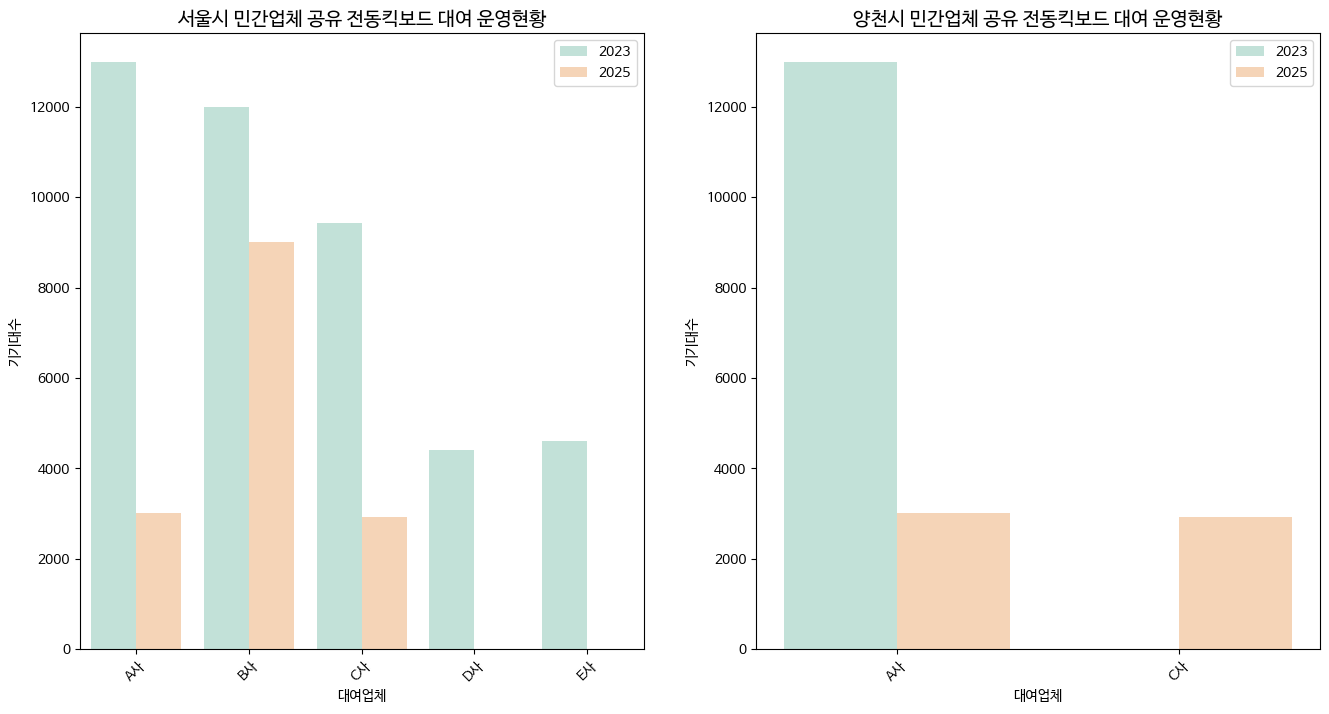

In [ ]:
# 각 데이터프레임에 연도 칼럼 추가
df_운영현황_23['연도'] = 2023
df_운영현황_25['연도'] = 2025

# 데이터프레임 합치기
df_운영현황 = pd.concat([df_운영현황_23, df_운영현황_25], ignore_index=True)

# '운영지역' 리스트에 '양천구'가 포함되어 있는지 확인하는 컬럼 추가
df_운영현황_23['양천구_운영여부'] = df_운영현황_23['운영지역'].apply(lambda x: '양천구' in x)
df_운영현황_25['양천구_운영여부'] = df_운영현황_25['운영지역'].apply(lambda x: '양천구' in x)


# '양천구'를 운영하는 업체만 필터링하여 확인
yangcheon_operating23 = df_운영현황_23[df_운영현황_23['양천구_운영여부']]
yangcheon_operating25 = df_운영현황_25[df_운영현황_25['양천구_운영여부']]

# 양천구 데이터프레임 합치기
yangcheon_operating = pd.concat([yangcheon_operating23, yangcheon_operating25], ignore_index=True)

# 데이터그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=df_운영현황, x='대여업체', y='기기대수(대)', hue='연도', palette='icefire', ax=axs[0])
axs[0].set_title('서울시 민간업체 공유 전동킥보드 대여 운영현황', fontsize=14)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('대여업체')
axs[0].set_ylabel('기기대수')
axs[0].legend()

sns.barplot(data=yangcheon_operating, x='대여업체', y='기기대수(대)', hue='연도', palette='icefire', ax=axs[1])
axs[1].set_title('양천시 민간업체 공유 전동킥보드 대여 운영현황', fontsize=14)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_xlabel('대여업체')
axs[1].set_ylabel('기기대수')
axs[1].legend()

plt.show()

- 2019.11월에 대여업체 A사, B사, D사, E사가, 2019.12월에 C사가 영업을 개시하였습니다.
- 전체적으로 2023년에 비해 2025년(2월 기준) 기기대수가 현저히 감소하였으며, D사와 E사는 2025년에 영업을 하지 않는 것으로 보입니다.
- 양천구의 경우 2023년에는 A사 업체만 운영하였으나, 2025년에는 A사와 C사 업체가 운영하고 있습니다.


> 서울시에서 민간업체 공유 전동킥보드 대여 운영 현황은 전체적으로 악화되었지만, <br>양천구의 경우 대여 업체가 1곳 늘어난 것으로 보아 해당 지역에서 전동킥보드의 수요가 어느 정도 있는 것으로 볼 수 있습니다.



### 2-2. 전동킥보드 견인 건수 및 유형 파악

#### 1) 견인 건수 변화 추세 파악

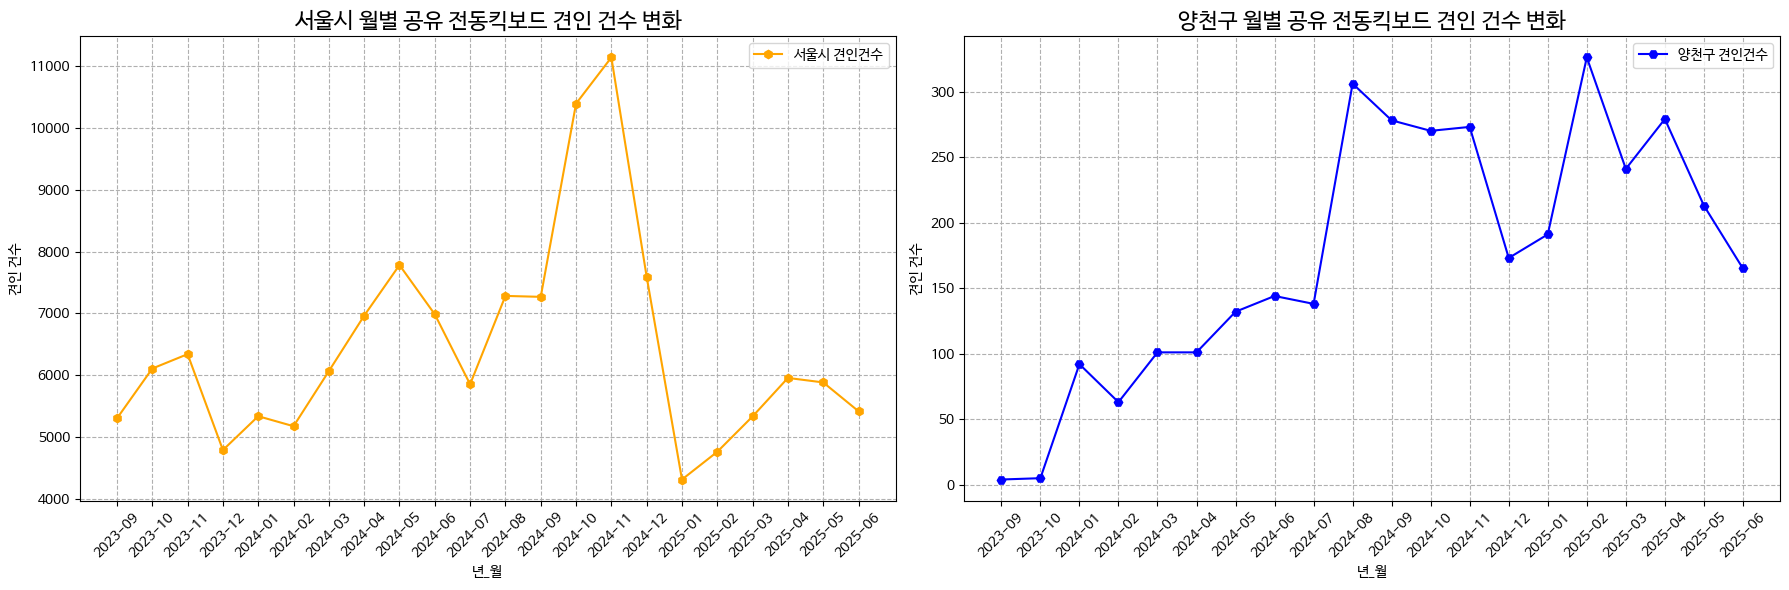

In [ ]:
# 1. 서울시 견인 건수 변화 파악
# 월별 견인 건수집계 : 신고일에서 연도와 월을 추출하여 새로운 컬럼 생성
df_견인현황['신고_년월'] = df_견인현황['신고일'].dt.to_period('M')

# 월별로 그룹화하여 견인 건수 계산
towing_counts_monthly = df_견인현황['신고_년월'].value_counts().sort_index()

# PeriodIndex를 문자열로 변환하여 시각화 준비 (matplotlib 호환성 위해)
towing_counts_monthly.index = towing_counts_monthly.index.astype(str)

# 2. 양천구 견인 건수 변화 파악

# 양천구 데이터 필터링
df_견인현황_양천구 = df_견인현황[df_견인현황['구정보'] == '양천구']

# 월별 견인 건수집계 : 신고일에서 연도와 월을 추출하여 새로운 컬럼 생성
df_견인현황_양천구['신고_년월'] = df_견인현황_양천구['신고일'].dt.to_period('M')

# 월별로 그룹화하여 견인 건수 계산
towing_counts_yc_monthly = df_견인현황_양천구['신고_년월'].value_counts().sort_index()

# PeriodIndex를 문자열로 변환하여 시각화 준비 (matplotlib 호환성 위해)
towing_counts_yc_monthly.index = towing_counts_yc_monthly.index.astype(str)

# 시계열 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(towing_counts_monthly.index, towing_counts_monthly.values, marker='h', color='orange', label='서울시 견인건수')
axs[0].set_title('서울시 월별 공유 전동킥보드 견인 건수 변화', fontsize=16)
axs[0].set_xlabel('년_월')
axs[0].set_ylabel('견인 건수')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].grid(True, linestyle='--')
axs[0].legend()

axs[1].plot(towing_counts_yc_monthly.index, towing_counts_yc_monthly.values, marker='H', color='blue', label='양천구 견인건수')
axs[1].set_title('양천구 월별 공유 전동킥보드 견인 건수 변화', fontsize=16)
axs[1].set_xlabel('년_월')
axs[1].set_ylabel('견인 건수')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].grid(True, linestyle='--')
axs[1].legend()

plt.tight_layout()
plt.show()

- 2023.09부터 2025.06까지 서울시와 양천구의 공유 전동킥보드 견인 건수 변화 추세를 살펴보았습니다.
- 서울시의 경우 전체적인 건수 변화 추세가 보이지 않지만, 2024년 10월, 11월에 견인 건수가 급증하였고 이후 2025년 1월에 급격히 하락하였습니다. 2024년 10,11월에 불법 주정차 신고가 급증하였고 이후 불법 주정차에 대한 해결책을 마련한 것으로 보입니다.
- 반면, 양천구의 경우 전체적으로 견인 건수가 증가하고 있는 추세로 보입니다.서울시와 마찬가지로 2024월 11월에 불법 주정차에 대한 해결책을 마련하여 12월에 견인 건수가 줄어들었지만 2025년 2월에 견인 건수가 급증한 것으로 보았을 때 **2024년 연말에 진행한 해결책이 큰 도움이 되지 않았던 것으로 보입니다.**
- 서울시와 양천구 모두 2025년 4월 이후부터 견인 건수가 하락한 것으로 보아 **2025.04에 불법 주정차에 대한 새로운 대안을 마련하였다고 추측**합니다.

- 그래프 시각화) 서울시와 양천구의 견인 건수 규모가 크게 차이나기 때문에 한 그래프 안에서 변화 추세 파악하는 것은 적절하지 않다고 판단하여 서울시와 양천구의 견인 건수 변화 추세를 중심으로 시각화하였습니다.


#### 2) 요일별 견인 건수 및 유형 파악

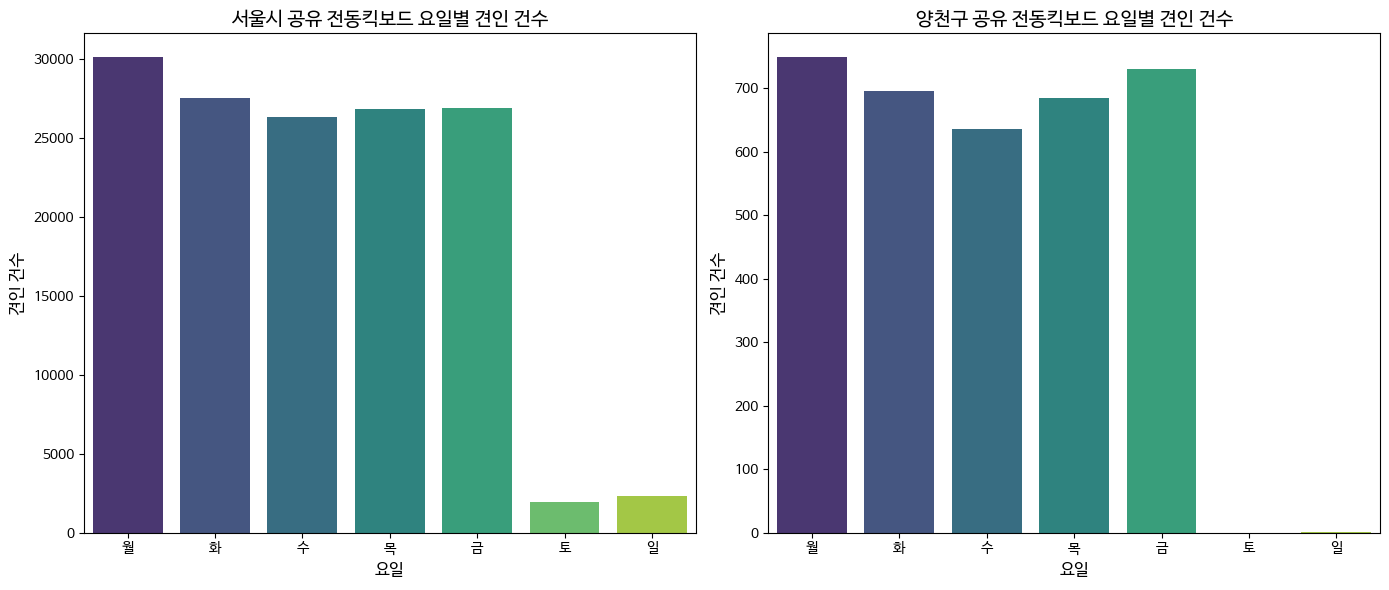

In [ ]:
# 요일 정보 추출
df_견인현황['요일'] = df_견인현황['신고일'].dt.dayofweek
df_견인현황_양천구['요일'] = df_견인현황_양천구['신고일'].dt.dayofweek

# 요일 이름 한글로 매핑
day_names = ['월', '화', '수', '목', '금', '토', '일']
df_견인현황['요일명'] = df_견인현황['요일'].map(lambda x: day_names[x])
df_견인현황_양천구['요일명'] = df_견인현황_양천구['요일'].map(lambda x: day_names[x])

# 1. 서울시 전체 요일별 견인 건수 집계
seoul_towing_counts_by_weekdays = df_견인현황['요일명'].value_counts().reindex(day_names)

# 2. 양천구 전체 요일별 견인 건수 집계
seoul_yc_towing_counts_by_weekdays = df_견인현황_양천구['요일명'].value_counts().reindex(day_names)

# 3. 시각화 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=seoul_towing_counts_by_weekdays.index, y=seoul_towing_counts_by_weekdays.values, palette='viridis', ax=axs[0]) # 막대 그래프
axs[0].set_title('서울시 공유 전동킥보드 요일별 견인 건수', fontsize=14)
axs[0].set_xlabel('요일', fontsize=12)
axs[0].set_ylabel('견인 건수', fontsize=12)

sns.barplot(x=seoul_yc_towing_counts_by_weekdays.index, y=seoul_yc_towing_counts_by_weekdays.values, palette='viridis', ax=axs[1]) # 막대 그래프
axs[1].set_title('양천구 공유 전동킥보드 요일별 견인 건수', fontsize=14)
axs[1].set_xlabel('요일', fontsize=12)
axs[1].set_ylabel('견인 건수', fontsize=12)

plt.tight_layout() # 라벨이 잘리지 않도록 레이아웃 조정
plt.show()

#### 3) 견인 유형 빈도 파악

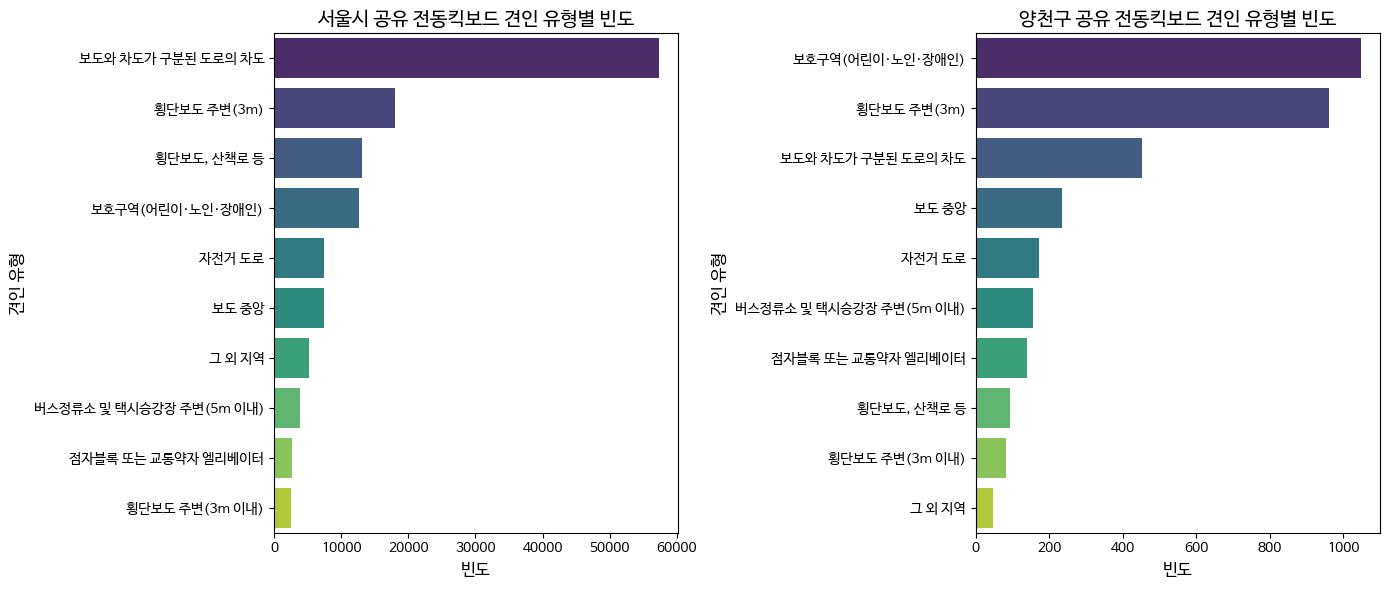

In [ ]:
# 1. 서울시 견인 유형 확인
towing_type = df_견인현황['유형'].value_counts().nlargest(10)

# 2. 양천구 견인 유형 확인
towing_type_yc = df_견인현황_양천구['유형'].value_counts().nlargest(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=towing_type.values, y=towing_type.index, palette='viridis', ax=axs[0]) # 가로 막대 그래프
axs[0].set_title('서울시 공유 전동킥보드 견인 유형별 빈도', fontsize=14)
axs[0].set_xlabel('빈도', fontsize=12)
axs[0].set_ylabel('견인 유형', fontsize=12)

sns.barplot(x=towing_type_yc.values, y=towing_type_yc.index, palette='viridis', ax=axs[1]) # 가로 막대 그래프
axs[1].set_title('양천구 공유 전동킥보드 견인 유형별 빈도', fontsize=14)
axs[1].set_xlabel('빈도', fontsize=12)
axs[1].set_ylabel('견인 유형', fontsize=12)

plt.tight_layout() # 라벨이 잘리지 않도록 레이아웃 조정
plt.show()

- 서울시에서 전동킥보드를 견인하는 유형은 **보도와 차도가 구분된 도로의 차도, 횡단보도 주변(3m), 횡단보도, 산책로 등, 보호구역, 자전거 도로 순**으로 많습니다.
- 양천구의 경우, **보호구역, 횡단보도 주변(3m), 보도와 차도가 구분된 도로의 차도, 보도 중앙, 자전거 도로 순**으로 많습니다.
- 공통적으로 견인이 많은 유형은 **보도와 차도가 구분된 도로의 차도**, **횡단보도 주변(3m)**,, **보호구역**, **자전거 도로**입니다.

=> 사람들이 많이 다니는 길가에 무단으로 전동킥보드를 주차하는 것을 알 수 있습니다.

### 2-3. 전동킥보드 주차구역 분석

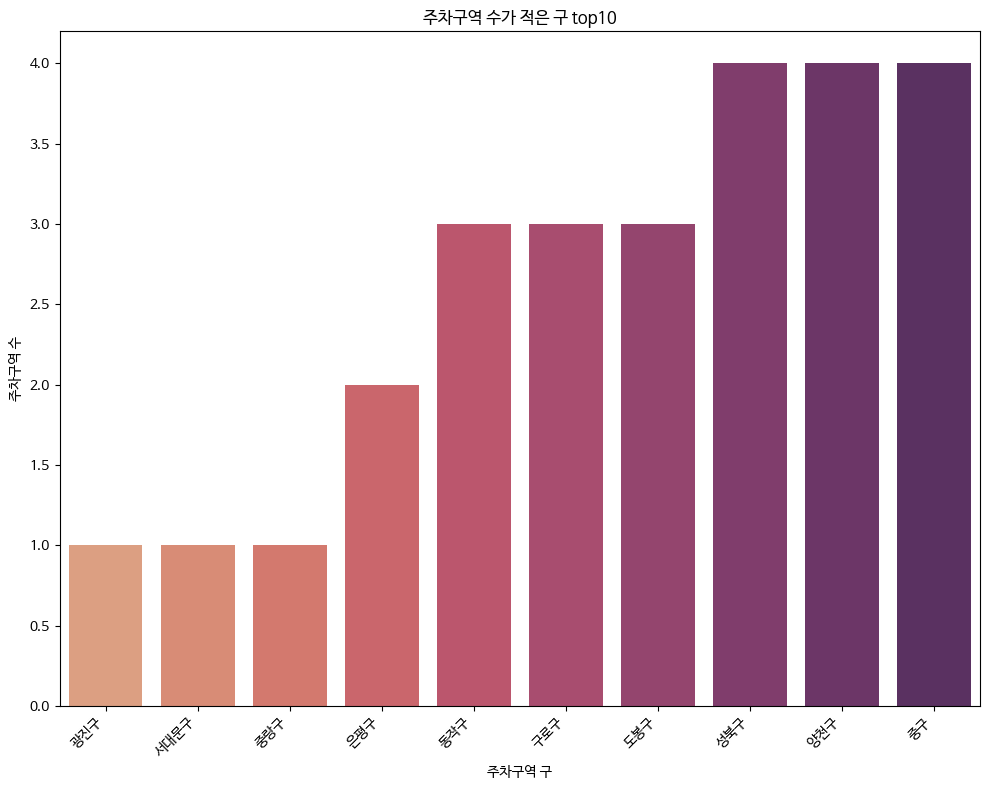

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Find the NanumBarunGothic font file and add it
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
if font_files:
    for fpath in font_files:
        fm.fontManager.addfont(fpath)


# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

df_주차구역_구역별 = df_주차구역.groupby('시군구명')
df_주차구역_부족 = df_주차구역_구역별.size().sort_values().nsmallest(10) # 행 개수

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=df_주차구역_부족.index, y=df_주차구역_부족.values, palette='flare')
plt.title('주차구역 수가 적은 구 top10')
plt.xlabel('주차구역 구')
plt.ylabel('주차구역 수')
plt.xticks(rotation=45, ha='right') # x축 라벨 회전 및 정렬
plt.tight_layout() # 그래프 레이아웃 조정
plt.show()

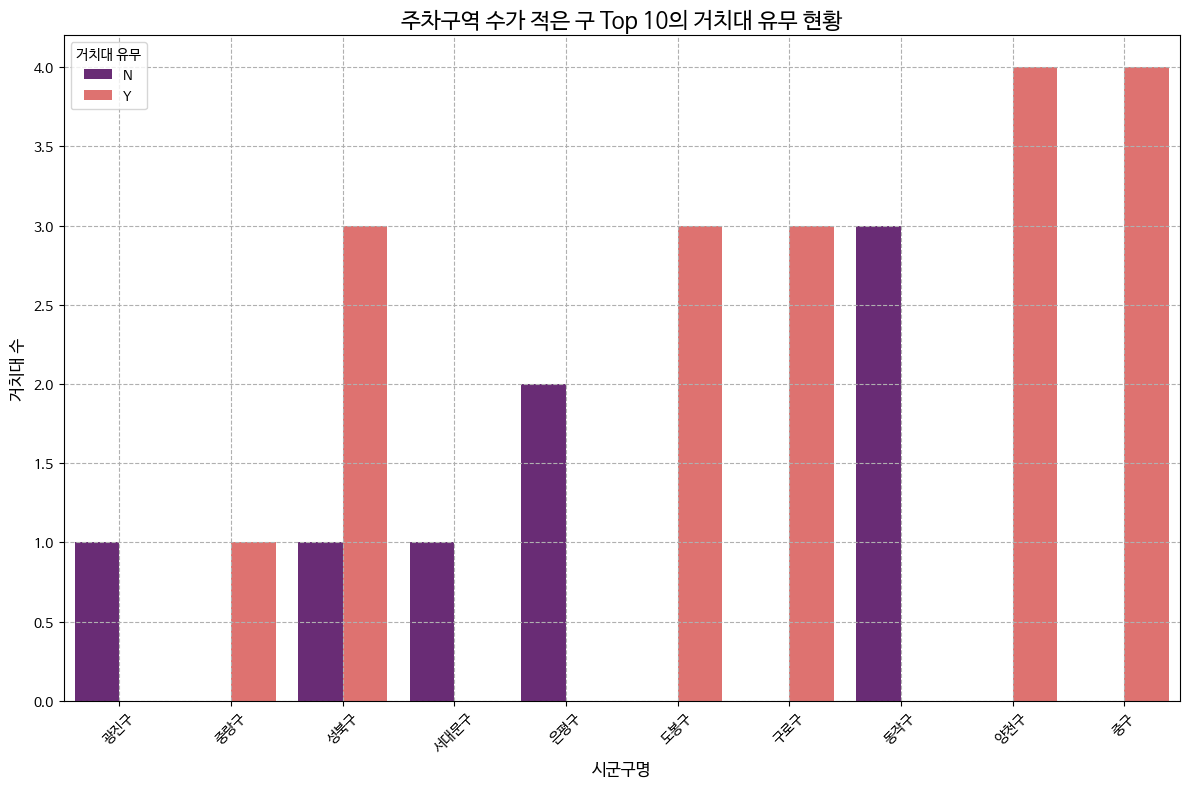

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 구별 거치대 유무 현황 확인 및 집계
df_주차구역_거치대 = df_주차구역.groupby('시군구명')['거치대 유무'].value_counts().sort_values(ascending=True).reset_index(name='count')

# 주차구역이 적은 상위 10개 구의 이름 목록 가져오기 (df_주차구역 사용)
df_주차구역_구역별 = df_주차구역.groupby('시군구명').size().sort_values().nsmallest(10)
top10_least_parking_districts = df_주차구역_구역별.index.tolist()

# df_주차구역_거치대 데이터프레임을 상위 10개 구로 필터링
df_주차구역_거치대_top10 = df_주차구역_거치대[df_주차구역_거치대['시군구명'].isin(top10_least_parking_districts)]


# 구별 그룹화된 거치대 유무와 거치대 수 막대그래프 (상위 10개 구만)
plt.figure(figsize=(12, 8))

sns.barplot(data=df_주차구역_거치대_top10, x='시군구명', y='count', hue='거치대 유무', palette='magma')
plt.title('주차구역 수가 적은 구 Top 10의 거치대 유무 현황', fontsize=16)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('거치대 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
df_주차구역[df_주차구역['시군구명'] == '양천구']

,순번,시군구명,주소,상세위치,거치대 유무
116,117,양천구,목동동로 151,서울출입국 외국인청 입구,Y
117,118,양천구,신정동 322-3,햇빛문고 앞,Y
118,119,양천구,신정동 322-4,양천문화회관 앞,Y
119,120,양천구,신정동 324-4,한사랑교회 앞,Y


- 양천구의 경우 주차구역이 적은 지역 공동 8위로, 주차구역 개수는 총 4개이며 모두 거치대가 있습니다.
- 주차구역이 4군데 있는 다른 구 지역보다는 거치대 상황이 양호하지만, 주차구역 4군데 중 3군데가 신정동 특정 지역에 몰려 있고, 1군데는 목동에 위치하여 주차구역 분포가 불균형하다는 것을 알 수 있습니다..

=> 동네별 전동킥보드 수요 현황을 바탕으로 주차구역을 추가로 마련하는 작업이 필요한지 확인해야 합니다.

### 2-4. 양천구 동네별 불법주정차 현황 비교

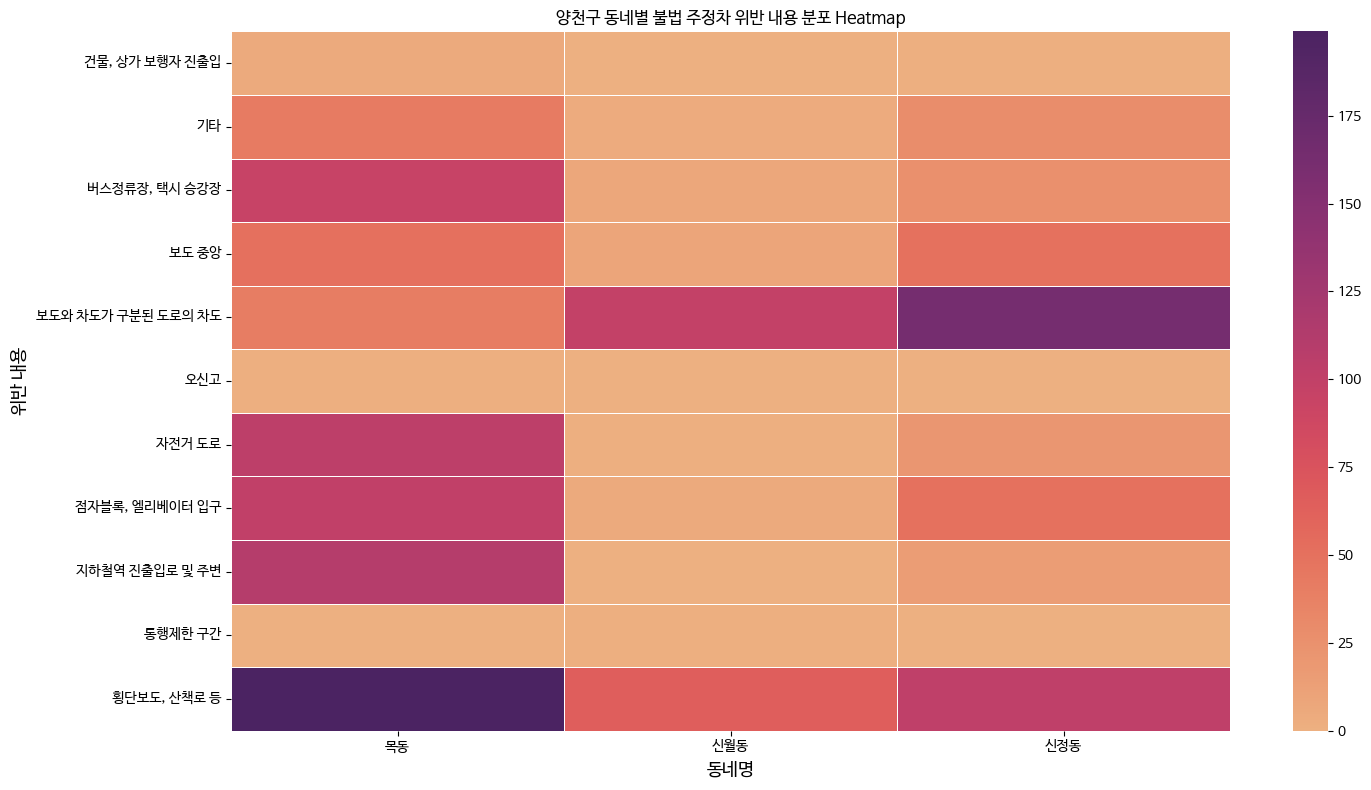

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Find the NanumBarunGothic font file and add it
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
if font_files:
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

df_yc_동네별_위반 = df_양천구불법주정차.groupby('동네명')['위반내용'].value_counts()
df_yc_동네별_위반 = df_yc_동네별_위반.reset_index(name='count')

# Heatmap을 위해 데이터 재구성 (pivot_table 사용)
df_yc_동네별_위반 = df_yc_동네별_위반.pivot_table(
    columns='동네명',
    index='위반내용',
    values='count',
    fill_value=0
)

# Heatmap 생성
plt.figure(figsize=(15, 8))
sns.heatmap(
    df_yc_동네별_위반,
    annot=False,  # 값 표시
    cmap='flare', # 색상 맵
    linewidths=0.5
)

plt.title('양천구 동네별 불법 주정차 위반 내용 분포 Heatmap')
plt.xlabel('동네명', fontsize=13)
plt.ylabel('위반 내용', fontsize=13)
plt.tight_layout()
plt.show()

- 동네별로 불법주정차 위반 내용을 살펴보았을 때, 동네별로 주로 불법주정차하는 위치가 다르다는 것을 알 수 있습니다.
- 목동의 경우 횡단보도, 산책로 등에서 가장 많이 위반되었고, 그 외에 자전거 도로, 점자블록, 엘리베이터 입구, 지하철역 진출입로 및 주변에서 상대적으로 많이 위반되었다는 것을 볼 수 있습니다.
- 신월동에서는 보도와 차도가 구분된 도로의 차도와 횡단보도, 산책로 등에서 많이 위반되었습니다.
- 신정동 역시 보도와 차도가 구분된 도로의 차도, 횡단보도, 산책로 등에서 많이 위반되었습니다.

=> 공통적으로 횡단보도, 산책로에서 불법주정차를 많이 하고 있다는 것을 알 수 있습니다. 그 외에도 길가에 무단으로 불법주정차하는 경우가 많다는 것을 봤을 때, 불법주정차 문제를 해결하기 위해서는 길가에 전동킥보드 주차구역을 추가로 설치해야 한다고 판단됩니다.

=> 사람들이 불법 주정차를 하는 장소(예: 지하철역 앞, 도서관 앞 등)을 파악해야 전동킥보드 주차구역을 효율적으로 설치할 수 있습니다.

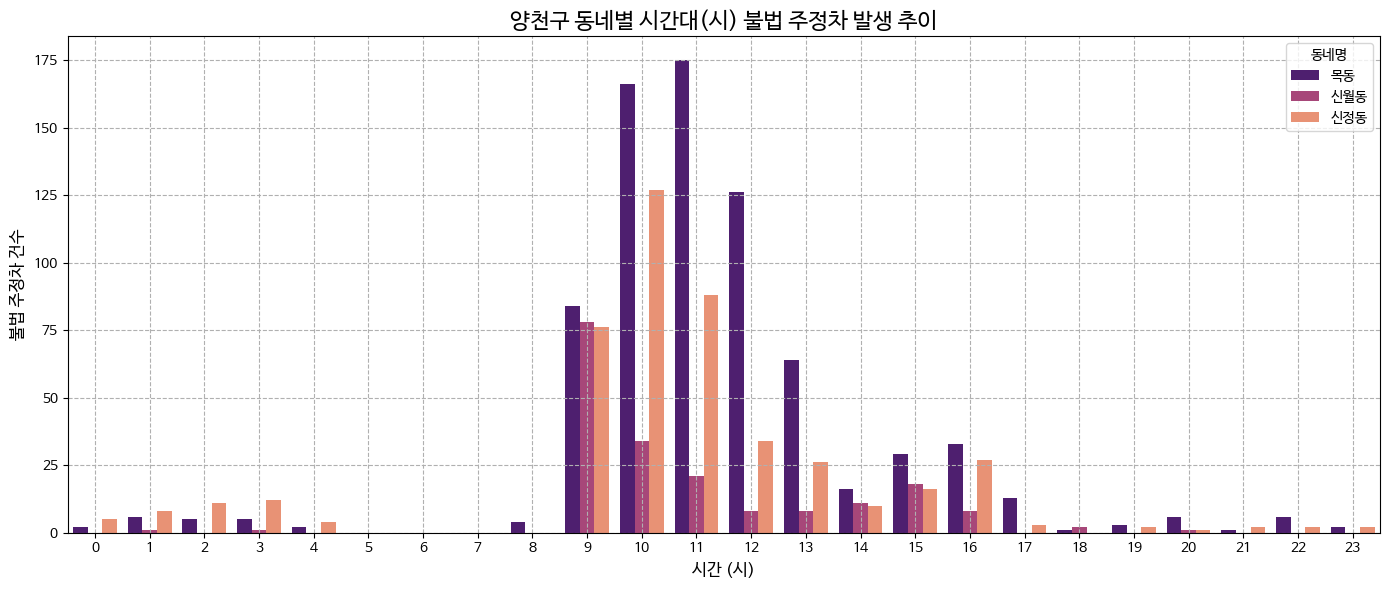

In [ ]:
# '견인일자' 컬럼을 datetime 형식으로 변환 (이미 되어 있지 않다면)
# 현재 df_양천구불법주정차.info() 결과에서 object 타입이므로 변환 필요
df_양천구불법주정차['견인일자'] = pd.to_datetime(df_양천구불법주정차['견인일자'])

# '견인일자'에서 시간(시) 정보 추출
df_양천구불법주정차['견인_시간'] = df_양천구불법주정차['견인일자'].dt.hour

# 동네별, 시간대별(시) 불법 주정차 건수 집계
# 각 동네별 시간대별 집계 데이터를 준비
illegal_parking_time_location = df_양천구불법주정차.groupby(['동네명', '견인_시간']).size().reset_index(name='count')

# 모든 시간대(0-23시)를 포함하도록 데이터를 보강
all_hours = range(24)
all_dongnes = illegal_parking_time_location['동네명'].unique()
# 모든 동네와 모든 시간대의 조합 생성
complete_time_location = pd.MultiIndex.from_product([all_dongnes, all_hours], names=['동네명', '견인_시간']).to_frame(index=False)

# 기존 집계 데이터와 병합하여 누락된 조합에 0 채우기
illegal_parking_time_location = pd.merge(complete_time_location, illegal_parking_time_location, on=['동네명', '견인_시간'], how='left').fillna(0)

# 'count' 컬럼을 정수형으로 변환
illegal_parking_time_location['count'] = illegal_parking_time_location['count'].astype(int)

# 막대 그래프
plt.figure(figsize=(14, 6))

sns.barplot(data=illegal_parking_time_location, x='견인_시간', y='count', hue='동네명', palette='magma')

plt.title('양천구 동네별 시간대(시) 불법 주정차 발생 추이', fontsize=16)
plt.xlabel('시간 (시)', fontsize=12)
plt.ylabel('불법 주정차 건수', fontsize=12)
plt.xticks(range(24)) # 0시부터 23시까지 모든 시간 표시
plt.grid(True, linestyle='--')
plt.legend(title='동네명')
plt.tight_layout()
plt.show()

## 3. 추가 심화 분석(상관관계, 대체재 추이 비교)

### 3-1. 전동킥보드 견인 건수 추이와 공공자전거 대여 건수 추이 비교
공공자전거가 전동킥보드의 대체재로 쓰이고 있는지 파악

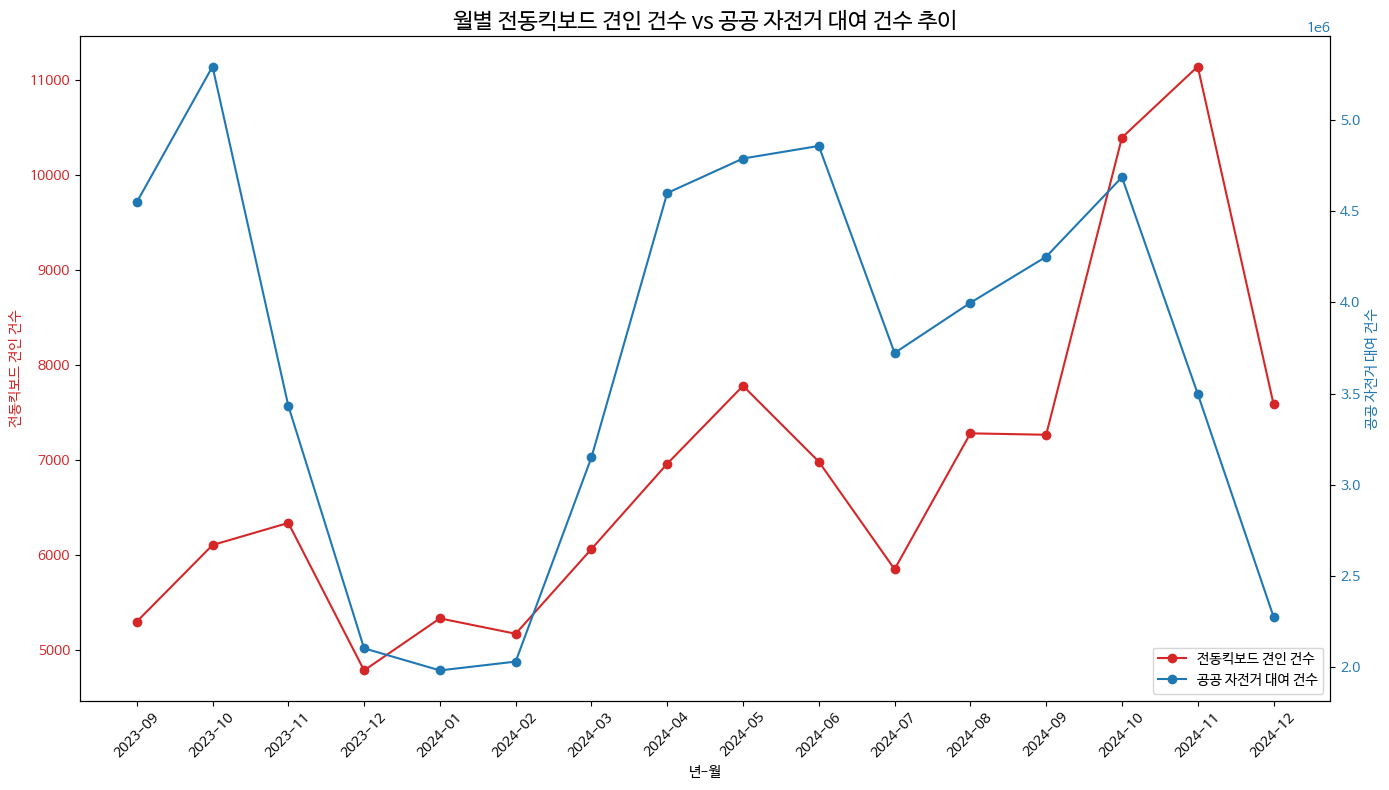

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. 전동킥보드 견인 건수 월별 집계
df_견인현황['신고_년월'] = df_견인현황['신고일'].dt.to_period('M')
towing_counts_monthly = df_견인현황['신고_년월'].value_counts().sort_index()
towing_counts_monthly.index = towing_counts_monthly.index.astype(str)

# 2. 공공 자전거 대여 건수 월별 집계
df_bic['대여년월'] = df_bic['대여일시'].dt.to_period('M')
bic_counts_monthly = df_bic.groupby('대여년월')['대여건수'].sum()
bic_counts_monthly.index = bic_counts_monthly.index.astype(str)

# 데이터 병합 및 시각화
# 두 시계열 데이터의 기간을 일치시키기 위해 공통된 월만 선택 (교집합)
common_months = sorted(list(set(towing_counts_monthly.index) & set(bic_counts_monthly.index)))

towing_counts_common = towing_counts_monthly.loc[common_months]
bic_counts_common = bic_counts_monthly.loc[common_months]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('년-월')
color = 'tab:red'
ax1.set_ylabel('전동킥보드 견인 건수', color=color)
ax1.plot(towing_counts_common.index, towing_counts_common.values, marker='o', color=color, label='전동킥보드 견인 건수')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45) # x축 라벨 회전

# 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('공공 자전거 대여 건수', color=color)
ax2.plot(bic_counts_common.index, bic_counts_common.values, marker='o', color=color, label='공공 자전거 대여 건수')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('월별 전동킥보드 견인 건수 vs 공공 자전거 대여 건수 추이', fontsize=16)
fig.tight_layout() # 레이아웃 조정
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes) # 범례 추가

plt.show()

피어슨 상관계수:
               전동킥보드 견인 건수  공공 자전거 대여 건수
전동킥보드 견인 건수      1.000000      0.335769
공공 자전거 대여 건수     0.335769      1.000000


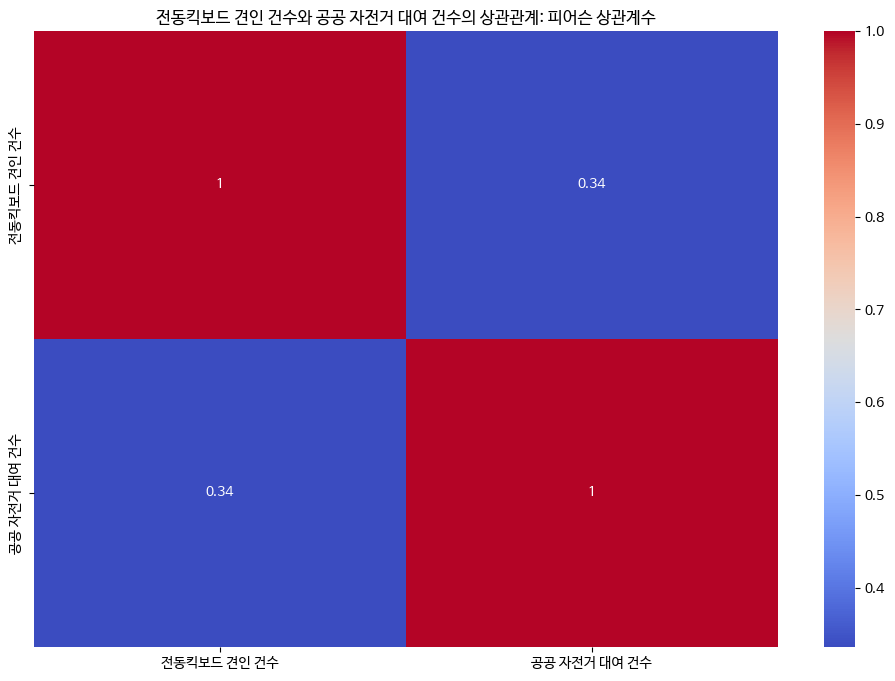


스피어만 상관계수:
               전동킥보드 견인 건수  공공 자전거 대여 건수
전동킥보드 견인 건수      1.000000      0.438235
공공 자전거 대여 건수     0.438235      1.000000


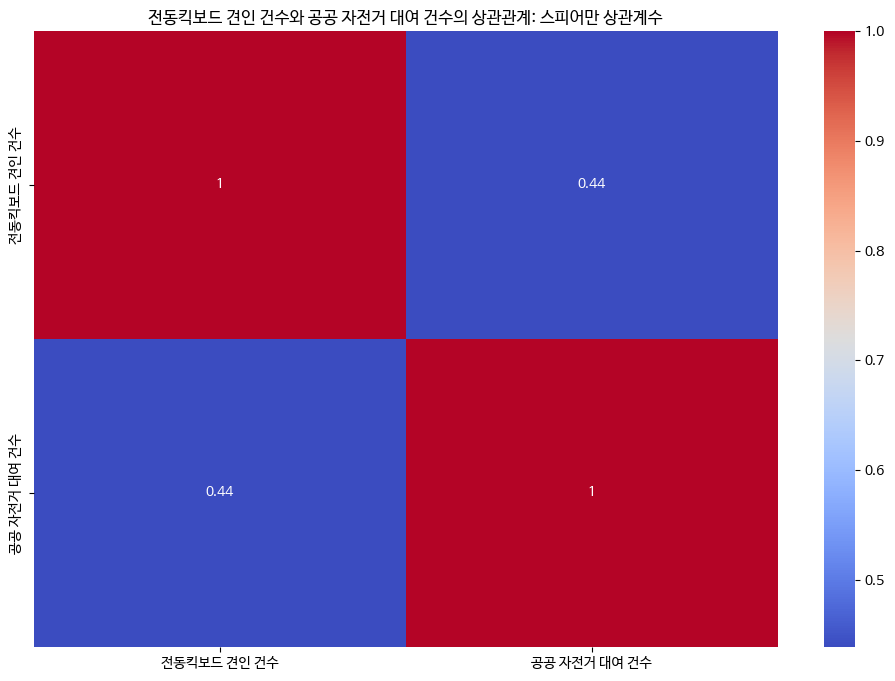

In [ ]:
# 상관분석으로 파악
# 월별 전동킥보드 견인 건수와 월별 공공 자전거 대여 건수 데이터를 하나의 데이터프레임으로 합치기
correlation_df = pd.DataFrame({
    '전동킥보드 견인 건수': towing_counts_common,
    '공공 자전거 대여 건수': bic_counts_common
})

# 피어슨 상관계수 계산
pearson_corr = correlation_df.corr(method='pearson')

# 스피어만 상관계수 계산
spearman_corr = correlation_df.corr(method='spearman')

print("피어슨 상관계수:\n", pearson_corr)
# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("전동킥보드 견인 건수와 공공 자전거 대여 건수의 상관관계: 피어슨 상관계수")
plt.show()

print("\n스피어만 상관계수:\n", spearman_corr)
# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("전동킥보드 견인 건수와 공공 자전거 대여 건수의 상관관계: 스피어만 상관계수")
plt.show()

- 전동킥보드 견인 건수 추이와 공공 자전거 대여 건수 추이가 대체적으로 유사하다는 것을 확인하였습니다.
  - 견인 건수가 급격히 하락하는 경우 공공 자전거 대여 건수도 하락하는 모습을 보이고 있습니다.
  - 사용자들이 전동킥보드 이용에 불편(예: 불법 주정차 단속 강화, 주정차 규제 강화, 견인 구역 확대 등)을 겪었기 때문에 대체재로 공공자전거로 이동 수단을 전환했을 가능성을 시사할 수 있습니다.
- 다만 2024.01과 2024.11는 추세가 반대이기 때문에 견인 건수의 증가/하락에 따라 공공자전거가 대체재로서 역할을 수행한다는 것을 확언하기는 어렵습니다.

<피어슨 상관계수와 스피어만 상관계수로 보는 전동킥보드 견인 건수와 공공 자전거 대여 건수 추이 관계>

- 스피어만 상관계수(0.438)가 피어슨 상관계수(0.336)보다 약간 더 높게 나왔습니다. 이는 두 변수 간에 강한 선형 관계는 아니지만, 어느 정도 **단조적인 관계**가 존재할 가능성을 시사합니다.
- 선 추이 그래프에서 보다 시피 전동킥보드 견인 건수가 증가할 때 공공 자전거 대여 건수도 증가하는 경향을 보이거나, 견인 건수가 감소할 때 공공 자전거 대여 건수도 감소하는 경향을 보이기는 하지만 반대의 상황도 보이기 때문에 두 데이터 사이의 관계가 직선적인 형태는 아니라고 볼 수 있습니다.
- 스피어만 상관계수가 0.438이므로 0.4~0.6 사이의 중간 정도의 상관관계로 볼 수 있습니다. 일반적으로 상관 계수가 0.7 이상일 때 강한 상관관계가 있다고 판단하기 때문에, 해당 데이터 분석 결과로만 봤을 때 공공 자전거가 전동킥보드의 직접적인 대체재로 쓰인다고 보기는 어렵습니다.**즉, 공공자전거는 전동 킥보드 이용이 불편해지는 시점에서 선택할 수 있는 여러 대안 중 하나라는 가능성을 시사하고 있습니다.**


### 3-2. 구별 주차 구역 수와 불법 주정차/견인 건수 상관관계 분석

구별 주차 구역 수와 견인 건수 병합 데이터:


,시군구명,주차구역 수,신고일,주소,유형,조치일,동네명,신고_년월,견인 건수
0,강남구,59.0,2024-10-16,서울특별시 강남구 삼성동 172-66,보도와 차도가 구분된 도로의 차도,2024-10-16,삼성동,2024-10,47
1,강남구,59.0,2024-10-15,서울특별시 강남구 삼성동 172-66,보도와 차도가 구분된 도로의 차도,2024-10-15,삼성동,2024-10,27
2,강남구,59.0,2025-05-27,서울특별시 강남구 삼성동 111-147,보도와 차도가 구분된 도로의 차도,2025-05-27,삼성동,2025-05,24
3,강남구,59.0,2024-12-28,서울특별시 강남구 역삼동 677-25,보도와 차도가 구분된 도로의 차도,2024-12-28,역삼동,2024-12,23
4,강남구,59.0,2025-04-11,서울특별시 강남구 논현동 279-23,보도와 차도가 구분된 도로의 차도,2025-04-11,논현동,2025-04,23


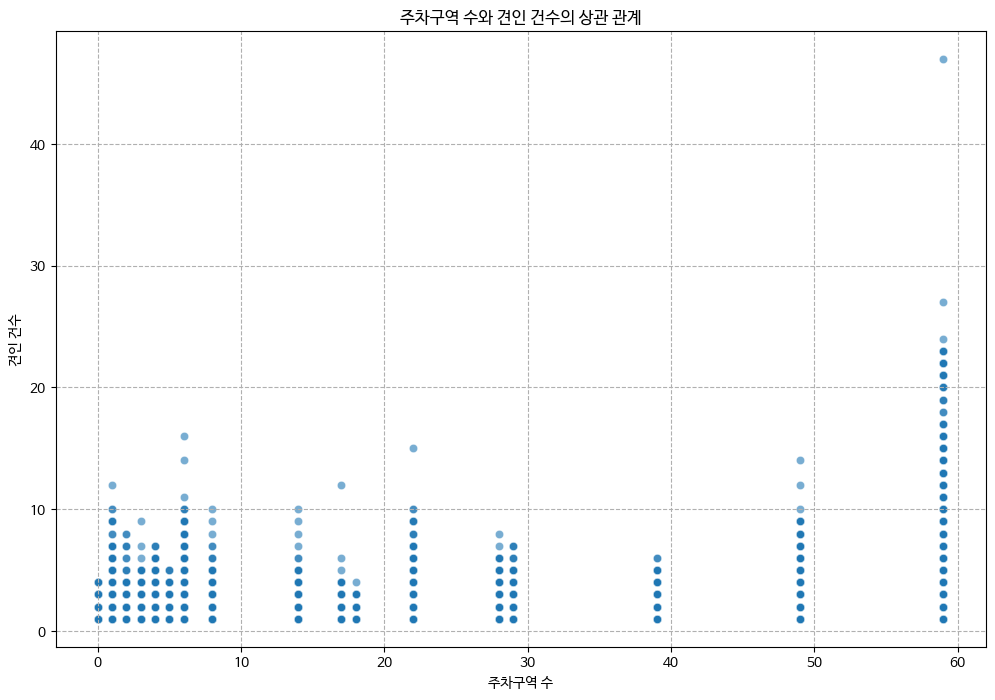

In [ ]:
# 1. 구별 주차 구역 총 개수 집계
parking_counts_district = df_주차구역.groupby('시군구명').size().reset_index(name='주차구역 수')

# 2. 구별 견인 건수 총 개수 집계
towing_counts_district = df_견인현황.value_counts().reset_index(name='견인 건수')
towing_counts_district.rename(columns={'구정보':'시군구명'}, inplace=True)

# 3. 주차 구역 수와 견인 건수 데이터 병합: 구 이름을 기준으로 outer join하여 모든 구를 포함하되 데이터가 없는 구는 NaN으로 표시
merged_counts = pd.merge(parking_counts_district, towing_counts_district, on='시군구명', how='outer')
merged_counts.fillna(0, inplace=True)

print("구별 주차 구역 수와 견인 건수 병합 데이터:")
display(merged_counts.head())

# 4. 시각화: 산점도
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_counts, x='주차구역 수', y='견인 건수', alpha=0.6)
plt.title('주차구역 수와 견인 건수의 상관 관계')
plt.xlabel('주차구역 수')
plt.ylabel('견인 건수')
plt.grid(True, linestyle='--')
plt.show()

구별 주차 구역 수와 견인 건수 병합 데이터:


,시군구명,주차구역 수,신고일,주소,유형,조치일,동네명,신고_년월,견인 건수
0,강남구,59.0,2024-10-16,서울특별시 강남구 삼성동 172-66,보도와 차도가 구분된 도로의 차도,2024-10-16,삼성동,2024-10,47
1,강남구,59.0,2024-10-15,서울특별시 강남구 삼성동 172-66,보도와 차도가 구분된 도로의 차도,2024-10-15,삼성동,2024-10,27
2,강남구,59.0,2025-05-27,서울특별시 강남구 삼성동 111-147,보도와 차도가 구분된 도로의 차도,2025-05-27,삼성동,2025-05,24
3,강남구,59.0,2024-12-28,서울특별시 강남구 역삼동 677-25,보도와 차도가 구분된 도로의 차도,2024-12-28,역삼동,2024-12,23
4,강남구,59.0,2025-04-11,서울특별시 강남구 논현동 279-23,보도와 차도가 구분된 도로의 차도,2025-04-11,논현동,2025-04,23


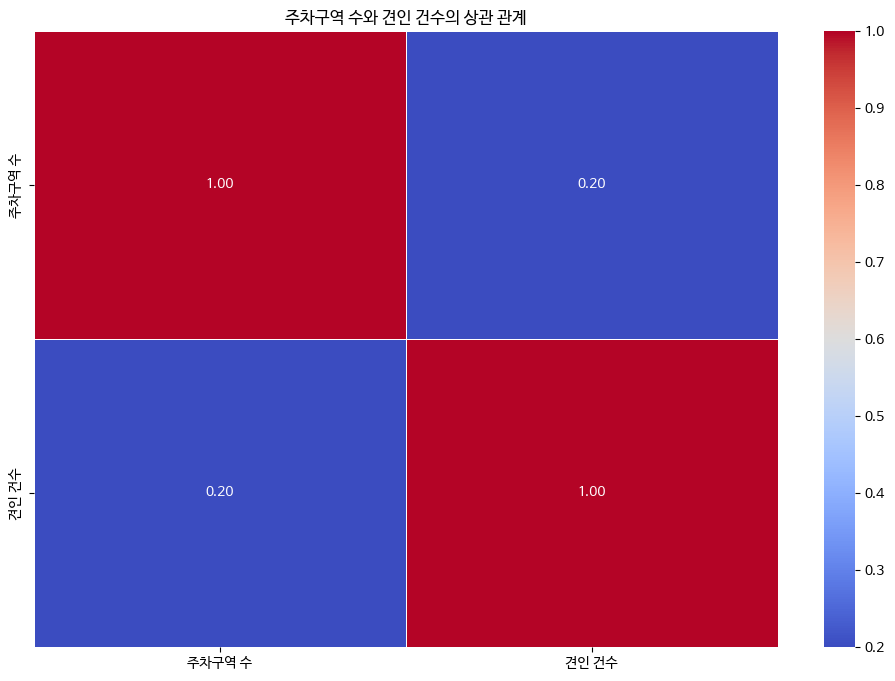

In [ ]:
# 1. 구별 주차 구역 총 개수 집계
parking_counts_district = df_주차구역.groupby('시군구명').size().reset_index(name='주차구역 수')

# 2. 구별 견인 건수 총 개수 집계
towing_counts_district = df_견인현황.value_counts().reset_index(name='견인 건수')
towing_counts_district.rename(columns={'구정보':'시군구명'}, inplace=True)

# 3. 주차 구역 수와 견인 건수 데이터 병합: 구 이름을 기준으로 outer join하여 모든 구를 포함하되 데이터가 없는 구는 NaN으로 표시
merged_counts = pd.merge(parking_counts_district, towing_counts_district, on='시군구명', how='outer')
merged_counts.fillna(0, inplace=True)

print("구별 주차 구역 수와 견인 건수 병합 데이터:")
display(merged_counts.head())

# 4. 상관계수 계산
correlation_matrix_p = merged_counts[['주차구역 수','견인 건수']].corr()

# 5. 시각화: 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_p, annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5, cbar=True)
plt.title('주차구역 수와 견인 건수의 상관 관계')
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

# 피어슨 상관계수와 p-value 계산
pearson_corr_pvalue, pearson_p_value = pearsonr(merged_counts['주차구역 수'], merged_counts['견인 건수'])
print(f"피어슨 상관계수: {pearson_corr_pvalue:.3f}, p-value: {pearson_p_value:.3f}")

# 스피어만 상관계수와 p-value 계산
spearman_corr_pvalue, spearman_p_value = spearmanr(merged_counts['주차구역 수'], merged_counts['견인 건수'])
print(f"스피어만 상관계수: {spearman_corr_pvalue:.3f}, p-value: {spearman_p_value:.3f}")

피어슨 상관계수: 0.200, p-value: 0.000
스피어만 상관계수: 0.164, p-value: 0.000


- 서울시 구별 주차구역 개수와 견인 건수의 상관계수는 0.164 ~ 0.2로 약한 양의 상관관계를 가지고 있습니다.
- 주차 구역 수가 증가하는 경향이 있을 때 견인 건수도 함께 증가한다는 경향이 있고 반대의 상황도 동일한 양의 관계를 보입니다. 하지만 그 관계가 매우 약합니다.
- 주차 구역 수의 변화가 견인 건수에 미치는 영향은 크지 않다고 보고 있습니다.= 주차구역 개수가 많아진다고 해서 견인 건수가 줄어들 수 있다고 판단하기는 어렵다는 것을 보여줍니다.

- 주차 구역이 많은 지역은 전동킥보드 이용량 자체가 많거나 단속이 더 활발하게 이루어지는 지역일 수 있다는 가능성을 열어두고 있어야 합니다.
- 구 내 특정 지역 단위로 불법주정차가 많이 일어나고 있는지 더 상세한 조사와 분석이 필요합니다.
- 주차 구역의 위치, 접근성, 거치대 유무 등을 고려하여 주차 구역의 질적인 측면이나 특정 지역에 대한 불균형한 인프라를 개선하면 불법 주정차 문제를 해결하는데 도움이 될 것이라고 판단합니다.